### Problem statement
##### A  lung cancer is a type of cancer that begins in the lungs and most often occurs in people who smoke.
Causes of lung cancer include smoking, second-hand smoke, exposure to certain toxins and family history.

In this project, we want to predict if a newly administered patient is affected with lung cancer or not using a previous dataset.

#### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

#### Loading the lung_cancer dataset.csv

In [2]:
# Dataset

df = pd.read_csv('lung_cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
df.shape

(309, 16)

In [4]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
df = df.drop_duplicates()

In [7]:
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [8]:
# Missing values

df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

### Visualization

M    142
F    134
Name: GENDER, dtype: int64


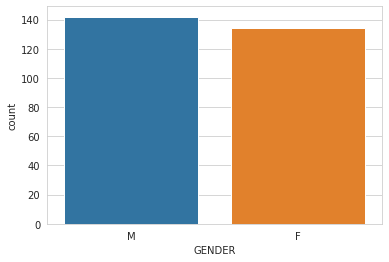

In [9]:
print(df.GENDER.value_counts())
sns.countplot('GENDER',data=df)

2    150
1    126
Name: SMOKING, dtype: int64


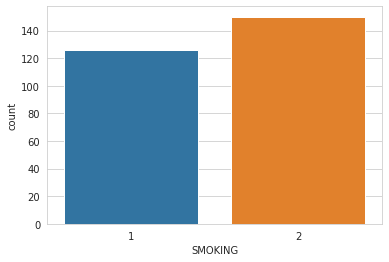

In [10]:
print(df.SMOKING.value_counts())
sns.countplot('SMOKING', data=df)

2    159
1    117
Name: YELLOW_FINGERS, dtype: int64


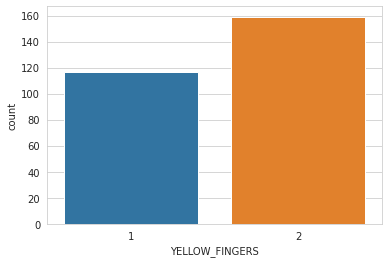

In [11]:
print(df.YELLOW_FINGERS.value_counts())
sns.countplot('YELLOW_FINGERS', data=df)

YES    238
NO      38
Name: LUNG_CANCER, dtype: int64


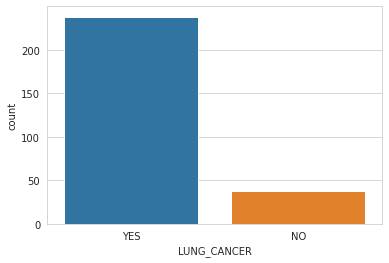

In [12]:
print(df.LUNG_CANCER.value_counts())
sns.countplot('LUNG_CANCER', data=df)

#### Label Encoding

In [13]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['GENDER'] = encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = encoder.fit_transform(df['LUNG_CANCER'])

In [14]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1,1
280,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1,0
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2,0
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2,0


In [35]:
# Feature Selection
# Using Backward Elimination

# Let's first split the dataset into Dependent and Independent variable

X = df.iloc[:,:-1].values
y = df.iloc[:, 15].values

# Print
print(X.shape)
print(y.shape)

(276, 15)
(276,)


#### Correlation features

In [78]:
corr = df.corr()
print(corr)

                         GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000 -0.013120  0.041131       -0.202506 -0.152032   
AGE                   -0.013120  1.000000 -0.073410        0.025773  0.050605   
SMOKING                0.041131 -0.073410  1.000000       -0.020799  0.153389   
YELLOW_FINGERS        -0.202506  0.025773 -0.020799        1.000000  0.558344   
ANXIETY               -0.152032  0.050605  0.153389        0.558344  1.000000   
PEER_PRESSURE         -0.261427  0.037848 -0.030364        0.313067  0.210278   
CHRONIC DISEASE       -0.189925 -0.003431 -0.149415        0.015316 -0.006938   
FATIGUE               -0.079020  0.021606 -0.037803       -0.099644 -0.181474   
ALLERGY                0.150174  0.037139 -0.030179       -0.147130 -0.159451   
WHEEZING               0.121047  0.052803 -0.147081       -0.058756 -0.174009   
ALCOHOL CONSUMING      0.434264  0.052049 -0.052771       -0.273643 -0.152228   
COUGHING               0.120

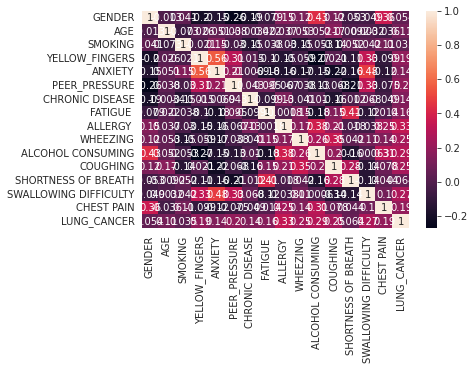

In [79]:
# Visualize correlation features
sns.heatmap(corr, annot = True)

#### Building a model

In [16]:
# Backward Elimination
# Import the library
import statsmodels.api as sm

# Set an index to the independent variable
X = np.append(arr = np.ones((276,1)).astype(int), values = X, axis = 1)

In [17]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1
272,1,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1
273,1,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2
274,1,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2


In [18]:
X_optimal = X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
# Fitting the data to statsmodels
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
# Calling the library
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     11.79
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           5.47e-22
Time:                        13:32:55   Log-Likelihood:                -25.964
No. Observations:                 276   AIC:                             83.93
Df Residuals:                     260   BIC:                             141.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2794      0.208     -6.141      0.000      -1.690      -0.869
x1            -0.0066      0.040     -0.166      0.869      -0.085       0.072
x2             0.0018      0.002      0.897      0.371      -0.002       0.006
x3             0.0702      0.035      1.994      0.047       0.001       0.139
x4             0.1263      0.045      2.835      0.005       0.039       0.214
x5             0.0735      0.047      1.579      0.116      -0.018       0.165
x6             0.0825      0.039      2.120      0.035       0.006       0.159
x7             0.1116      0.036      3.125      0.002       0.041       0.182
x8             0.1562      0.041      3.785      0.000       0.075       0.237
x9             0.1438      0.037      3.847      0.000       0.070       0.217
x10            0.0559      0.038      1.461      0.145      -0.019       0.131
x11            0.1960      0.043      4.505      0.000       0.110       0.282
x12            0.1084      0.042      2.607      0.010       0.027       0.190
x13            0.0406      0.042      0.968      0.334      -0.042       0.123
x14            0.1037      0.041      2.499      0.013       0.022       0.185
x15            0.0372      0.038      0.980      0.328      -0.038       0.112
==============================================================================
Omnibus:                       20.278   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.781
Skew:                          -0.640   Prob(JB):                     1.13e-05
Kurtosis:                       3.587   Cond. No.                         812.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the summary above, was can easily remove the variables with the p-value greater than 0.05

In [19]:
# We run the command again as well have removed the variables with p-value > 0.05
X_optimal = X[:, [0,1,4,5,7,8,9,10,12,13,15]]
# Fitting the data to statsmodels
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
# Calling the library
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     12.09
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           3.32e-17
Time:                        13:32:55   Log-Likelihood:                -45.679
No. Observations:                 276   AIC:                             113.4
Df Residuals:                     265   BIC:                             153.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7204      0.159     -4.541      0.000      -1.033      -0.408
x1             0.0262      0.040      0.659      0.510      -0.052       0.104
x2             0.0978      0.045      2.196      0.029       0.010       0.186
x3             0.1578      0.045      3.535      0.000       0.070       0.246
x4             0.1208      0.037      3.240      0.001       0.047       0.194
x5             0.1408      0.042      3.362      0.001       0.058       0.223
x6             0.1854      0.038      4.821      0.000       0.110       0.261
x7             0.0988      0.039      2.550      0.011       0.023       0.175
x8             0.1287      0.042      3.032      0.003       0.045       0.212
x9            -0.0133      0.042     -0.316      0.753      -0.096       0.069
x10            0.0898      0.039      2.301      0.022       0.013       0.167
==============================================================================
Omnibus:                       39.871   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.561
Skew:                          -1.008   Prob(JB):                     3.86e-12
Kurtosis:                       3.712   Cond. No.                         45.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# We run the command again as well have removed the variables with p-value > 0.05
X_optimal = X[:, [0,1,5,8,9,10,12,13,15]]
# Fitting the data to statsmodels
regressor_OLS = sm.OLS(endog = y, exog = X_optimal).fit()
# Calling the library
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     12.46
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           3.61e-15
Time:                        13:32:55   Log-Likelihood:                -53.786
No. Observations:                 276   AIC:                             125.6
Df Residuals:                     267   BIC:                             158.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4279      0.144     -2.972      0.003      -0.711      -0.144
x1            -0.0129      0.039     -0.328      0.744      -0.091       0.065
x2             0.2043      0.038      5.353      0.000       0.129       0.279
x3             0.1232      0.043      2.890      0.004       0.039       0.207
x4             0.2010      0.038      5.225      0.000       0.125       0.277
x5             0.1026      0.040      2.585      0.010       0.024       0.181
x6             0.1236      0.042      2.961      0.003       0.041       0.206
x7            -0.0118      0.043     -0.275      0.783      -0.096       0.072
x8             0.0904      0.040      2.259      0.025       0.012       0.169
==============================================================================
Omnibus:                       52.829   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.565
Skew:                          -1.176   Prob(JB):                     8.71e-18
Kurtosis:                       4.141   Cond. No.                         35.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

!!! Okay, so we have a perfect numbers of variables whose p-values is < 0.05

In [42]:
print(X_optimal.shape)
Y = np.reshape(y, (-1,1))
print(Y.shape)

(276, 9)
(276, 1)


In [43]:
# Split into Training set and Testing set
# Import the library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X_optimal, Y,
    test_size=0.25,
    random_state=0)
# Print
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(207, 9)
(69, 9)
(207, 1)
(69, 1)


### Logistic Regression

In [58]:
# Let's Create the model
# Import the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [62]:
# Prediction
y_pred = lr.predict(X_test)
pd.DataFrame((y_pred).astype(int))

,0
0,0
1,1
2,1
3,1
4,1
...,...
64,1
65,1
66,1
67,1


#### Evaluation

In [75]:
# Checking for the Accuracy 

print("Training Accuracy =", lr.score(X_train,y_train))
print("Testing Accuracy =", lr.score(X_test,y_test))

Training Accuracy = 0.9082125603864735
Testing Accuracy = 0.855072463768116


In [76]:
from sklearn.metrics import mean_squared_error as mse
print("MSE Value =", mse(y_test,y_pred))

MSE Value = 0.14492753623188406


In [77]:
lr.coef_

array([[-2.39038155e-06, -1.73706568e-01,  1.81555550e+00,
         1.07902857e+00,  1.79256745e+00,  1.01502282e+00,
         8.83392179e-01,  4.23355013e-01,  9.13399027e-01]])

#### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
# Prediction
dtc_pred = dtc.predict(X_test)
pd.DataFrame((dtc_pred).astype(int))

,0
0,0
1,1
2,1
3,1
4,1
...,...
64,1
65,1
66,1
67,1


#### Evaluation

In [86]:
# Checking the Accuracy
print("Training Accuracy =", dtc.score(X_train,y_train))
print("Testing Accuracy =", dtc.score(X_test,y_test))

Training Accuracy = 0.9323671497584541
Testing Accuracy = 0.8695652173913043


In [88]:
# MSE value for Decision tree
print("MSE Value =", mse(y_test,dtc_pred))

MSE Value = 0.13043478260869565


#### Scales Vector Machine

In [91]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [92]:
# Prediction
svc_pred = svc.predict(X_test)
pd.DataFrame(svc_pred)

,0
0,0
1,1
2,1
3,1
4,1
...,...
64,1
65,1
66,1
67,1


#### Evaluation

In [93]:
# Checking the Accuracy
print("Training Accuracy =", svc.score(X_train,y_train))
print("Testing Accuracy =", svc.score(X_test,y_test))

Training Accuracy = 0.8985507246376812
Testing Accuracy = 0.855072463768116


#### GaussianNB

In [94]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)

GaussianNB()

In [95]:
# Prediction
gb_pred = gb.predict(X_test)
pd.DataFrame(gb_pred)

,0
0,0
1,1
2,1
3,1
4,0
...,...
64,1
65,1
66,1
67,1


#### Evaluation

In [96]:
# Checking the Accuracy
print("Training Accuracy =", gb.score(X_train,y_train))
print("Testing Accuracy =", gb.score(X_test,y_test))

Training Accuracy = 0.8743961352657005
Testing Accuracy = 0.7971014492753623


#### Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [98]:
# Prediction
rfc_pred = rfc.predict(X_test)
pd.DataFrame(rfc_pred)

,0
0,0
1,1
2,1
3,1
4,1
...,...
64,1
65,1
66,1
67,1


In [99]:
# Checking the Accuracy
print("Training Accuracy =", rfc.score(X_train,y_train))
print("Testing Accuracy =", rfc.score(X_test,y_test))

Training Accuracy = 0.9323671497584541
Testing Accuracy = 0.8695652173913043


### Overview

#### After applying the different types of algorithm models, we got the below accuracies with different method used

#### Logistic Regression = 90%
#### Decision Tree algorithm = 93%
#### Scalar Vector Machine = 89%
#### GaussianNB algorithm = 87%
#### Random Forest Classifier = 93%